## Gravação do Audio

In [24]:
import sounddevice as sd
import numpy as np

DURACAO = 6
TAXA_AMOSTRAGEM = 44100
CANAIS = 1
SUBTIPO = 'int16'

print("gravando, diga algo...")

audio_gravado = sd.rec(
    int(DURACAO * TAXA_AMOSTRAGEM),
    samplerate=TAXA_AMOSTRAGEM,
    channels=CANAIS,
    dtype=SUBTIPO,
    blocking= True
)

print("gravação concluida!")

gravando, diga algo...
gravação concluida!


In [25]:
import wave
  
with wave.open("audio.wav", 'wb') as arquivo:
    arquivo.setnchannels(CANAIS)
    arquivo.setsampwidth(2)
    arquivo.setframerate(TAXA_AMOSTRAGEM)
    arquivo.writeframes(audio_gravado.tobytes())

print("gravação salva como \"audio.wav\"")

gravação salva como "audio.wav"


# Visualização do espectro de onda do Audio:


## - Visualização no Tempo:

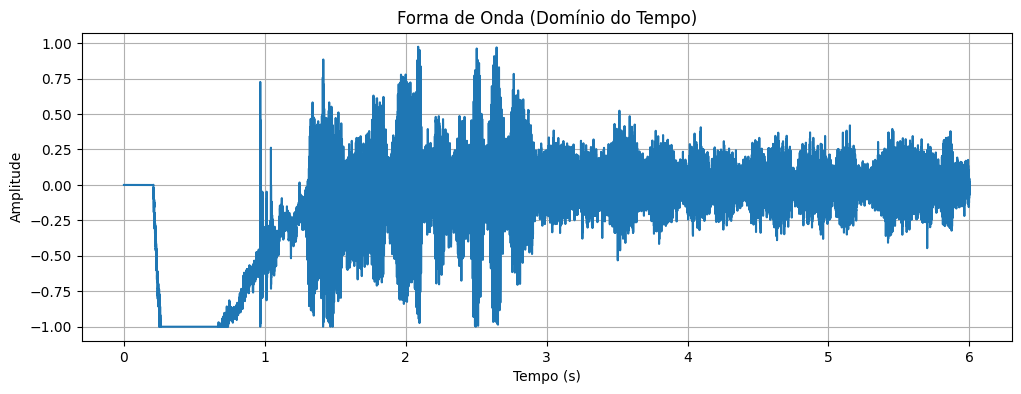

In [39]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Abre o arquivo WAV
with wave.open('audio.wav', 'rb') as wav_file:
    # Obtém os parâmetros do áudio
    n_canais = wav_file.getnchannels()
    taxa_amostragem = wav_file.getframerate()
    n_quadros = wav_file.getnframes()
    dados = wav_file.readframes(n_quadros)

# Converte os dados para um array numpy (16-bit)
audio_array = np.frombuffer(dados, dtype=np.int16)

# Normaliza para o intervalo [-1, 1]
audio_normalizado = audio_array / (2 ** 15)

# Cria um eixo de tempo
tempo = np.linspace(0, n_quadros / taxa_amostragem, num=n_quadros)

# Plota a forma de onda
plt.figure(figsize=(12, 4))
plt.plot(tempo, audio_normalizado)
plt.title('Forma de Onda (Domínio do Tempo)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## Visualização na Frequência:

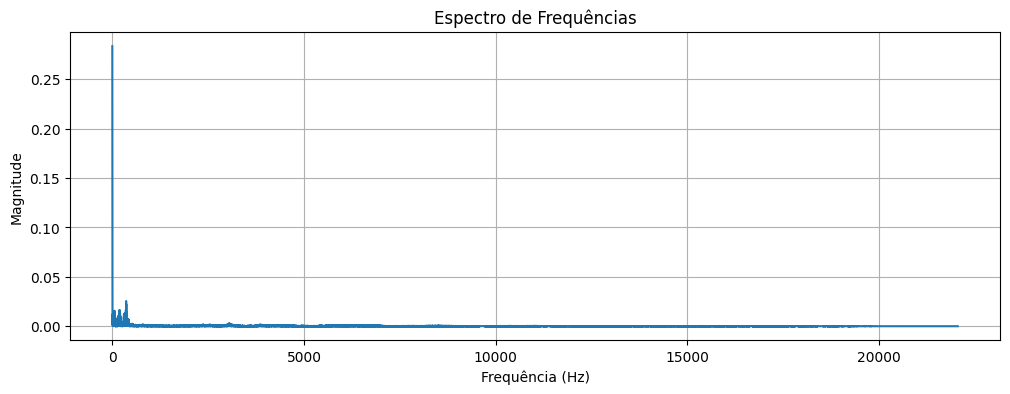

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Abre o arquivo WAV
with wave.open('audio.wav', 'rb') as wav_file:
    n_canais = wav_file.getnchannels()
    taxa_amostragem = wav_file.getframerate()
    n_quadros = wav_file.getnframes()
    dados = wav_file.readframes(n_quadros)

# Converte para array numpy (16-bit) e normaliza
audio_array = np.frombuffer(dados, dtype=np.int16)
audio_normalizado = audio_array / (2**15)

# Calcula a FFT
N = len(audio_normalizado)
yf = fft(audio_normalizado)
xf = fftfreq(N, 1/taxa_amostragem)[:N//2]  # Apenas frequências positivas

# Plota o espectro de magnitude
plt.figure(figsize=(12, 4))
plt.plot(xf, 2/N * np.abs(yf[0:N//2]))
plt.title('Espectro de Frequências')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()